In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# IHC Experiment

In [3]:
ihc_micro_md = pd.read_table('../data/Microbiome/longIHC_micro_metadata_cleaned.txt', sep='\t', index_col=0)
ihc_micro_md.head()

,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,diet,dna_extracted,dob,...,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,timepoint,title,treatment
sample_name,,,,,,,,,,,,,,,,,,,,,
11548.A15.85.1,A15.85.1,not applicable,On shelf,Fighting cage,A15,2017-09-26 11:00,Mouse 85 baseline stool collection 1 of 20,Regular chow,True,7/18/17,...,True,11548,A15.85.1,feces,mouse gut metagenome,male,410661,NaN,10 week IHC,NaN
11548.A15.85.10,A15.85.10,64,On shelf,Started changing air cages 4x/wk 10/26/2017,A15,2017-10-27 11:00,Mouse 85 stool collection 10 of 20,Regular chow,True,7/18/17,...,True,11548,A15.85.10,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A15.85.10.b,A15.85.10,64,On shelf,Started changing air cages 4x/wk 10/26/2017,A15,2017-10-27 11:00,Mouse 85 stool collection 10 of 20,Regular chow,True,7/18/17,...,True,11548,A15.85.10,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A15.85.11,A15.85.11,96.7,On shelf,NaN,A15,2017-10-31 11:00,Mouse 85 stool collection 11 of 20,Regular chow,True,7/18/17,...,True,11548,A15.85.11,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A15.85.11.b,A15.85.11,96.7,On shelf,NaN,A15,2017-10-31 11:00,Mouse 85 stool collection 11 of 20,Regular chow,True,7/18/17,...,True,11548,A15.85.11,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided


In [4]:
ihc_micro_fam = pd.read_table('../data/Microbiome/longIHC_rarefied_table_HFD_fecal_family_relfreq.txt', sep='\t', index_col=0)
ihc_micro_fam_rf = ihc_micro_fam.T
ihc_micro_fam_rf.head()

#OTU ID,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__SAGMA-X,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__;c__;o__;f__,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__BPC015;f__,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__,k__Bacteria;p__Acidobacteria;c__BPC102;o__B110;f__,k__Bacteria;p__Acidobacteria;c__RB25;o__;f__,k__Bacteria;p__Acidobacteria;c__Solibacteres;o__Solibacterales;f__,k__Bacteria;p__Acidobacteria;c__Solibacteres;o__Solibacterales;f__Solibacteraceae,...,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__;f__,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Opitutales;f__Opitutaceae,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales;f__Puniceicoccaceae,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__Verrucomicrobia;c__[Pedosphaerae];o__;f__,k__Bacteria;p__Verrucomicrobia;c__[Pedosphaerae];o__[Pedosphaerales];f__,k__Bacteria;p__Verrucomicrobia;c__[Spartobacteria];o__[Chthoniobacterales];f__[Chthoniobacteraceae],k__Bacteria;p__WWE1;c__[Cloacamonae];o__[Cloacamonales];f__[Cloacamonaceae],k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
11548.A19.103.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.730098,0.0,0.0,0.0,0.0,0.0,0.000000
11548.A19.102.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.520392,0.0,0.0,0.0,0.0,0.0,0.000000
11548.A21.110.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.134706,0.0,0.0,0.0,0.0,0.0,0.000000
11548.A18.97.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.697255,0.0,0.0,0.0,0.0,0.0,0.000000
11548.A18.98.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.756961,0.0,0.0,0.0,0.0,0.0,0.000294


In [5]:
ihc_family_relfreq = pd.merge(ihc_micro_fam_rf, ihc_micro_md, left_index=True, right_index=True)
ihc_family_relfreq.head()

,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__SAGMA-X,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__;c__;o__;f__,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__BPC015;f__,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__,k__Bacteria;p__Acidobacteria;c__BPC102;o__B110;f__,k__Bacteria;p__Acidobacteria;c__RB25;o__;f__,k__Bacteria;p__Acidobacteria;c__Solibacteres;o__Solibacterales;f__,k__Bacteria;p__Acidobacteria;c__Solibacteres;o__Solibacterales;f__Solibacteraceae,...,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,timepoint,title,treatment
11548.A19.103.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,11548,A19.103.10,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A19.102.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,11548,A19.102.16,feces,mouse gut metagenome,male,410661,NaN,10 week IHC,NaN
11548.A21.110.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,11548,A21.110.9,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A18.97.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,11548,A18.97.19,feces,mouse gut metagenome,male,410661,NaN,10 week IHC,NaN
11548.A18.98.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,11548,A18.98.10,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided


In [6]:
ihc_family_relfreq2 = ihc_family_relfreq.drop(ihc_family_relfreq.index[ihc_family_relfreq.host_age == 20])

In [7]:
ihc_family_relfreq_renamed = ihc_family_relfreq2.rename(columns={'k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae':'Verrucomicrobiaceae', 
           'k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae':'Coriobacteriaceae', 
           'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7':'S24-7', 
           'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae':'Lachnospiraceae', 
           'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae':'Ruminococcaceae', 
            'k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae': 'Erysipelotrichaceae'})

In [8]:
famlist = ['Verrucomicrobiaceae', 'Coriobacteriaceae', 'S24-7', 'Lachnospiraceae', 'Ruminococcaceae', 'Erysipelotrichaceae']

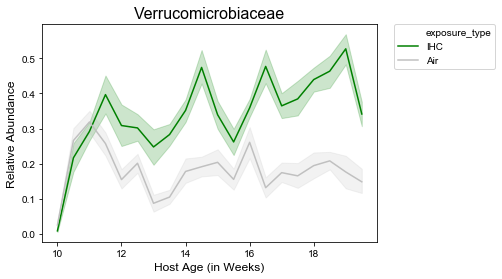

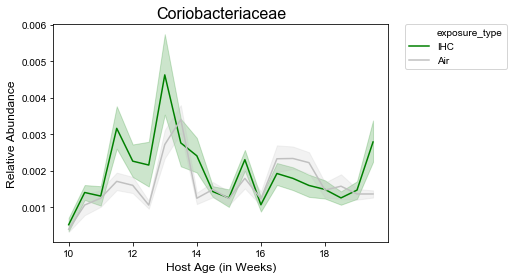

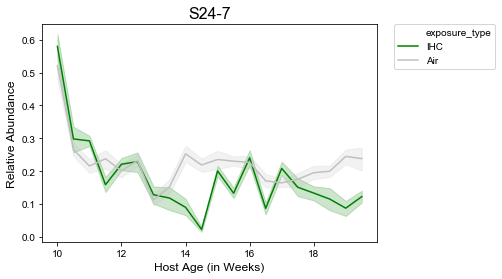

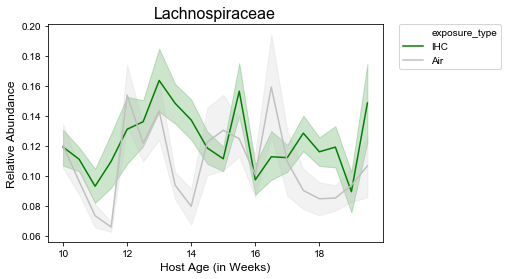

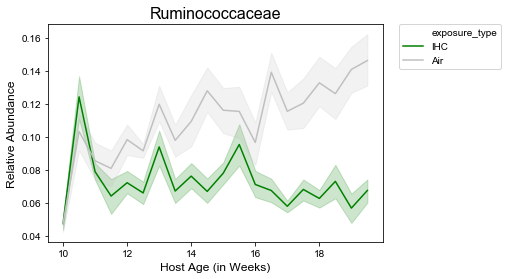

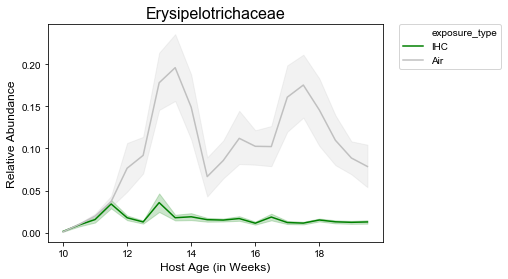

In [9]:
for fam in famlist:
    g = sns.lineplot(x='host_age', y=fam, hue='exposure_type', ci=68, 
                     palette=['green', 'silver'], data=ihc_family_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(fam, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/IHC/longIHC_micro_SEM_%s.svg' % fam, dpi=300, bbox_inches = "tight")
    plt.show()

# IH_IC Experiment

In [10]:
ihic_micro_md = pd.read_table('../data/Microbiome/long_IH_IC_MetaData.txt', sep='\t', index_col=0)
ihic_micro_md.head()

,metab-sample-id,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,diet,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
sample_name,,,,,,,,,,,,,,,,,,,,,
11829.A34.135.1,A34_135_1,weeks,A34.135.1,Not applicable,On shelf,NaN,A34,4/3/18 12:00,Mouse 135 baseline stool collection 1 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.10,A34_135_10,weeks,A34.135.10,18,On shelf,NaN,A34a,5/4/18 12:00,Mouse 135 stool collection 10 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.11,A34_135_11,weeks,A34.135.11,23.9,On shelf,NaN,A34a,5/8/18 12:00,Mouse 135 stool collection 11 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.12,A34_135_12,weeks,A34.135.12,17.4,On shelf,NaN,A34a,5/11/18 12:00,Mouse 135 stool collection 12 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.13,A34_135_13,weeks,A34.135.13,23.1,On shelf,NaN,A34a,5/15/18 12:00,Mouse 135 stool collection 13 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


## IH vs Air

In [11]:
ih_micro_fam = pd.read_table('../data/Microbiome/longIHIC_HFD_fecal_longIH_family_relfreq.txt', sep='\t', index_col=0)
ih_micro_fam_rf = ih_micro_fam.T
ih_micro_fam_rf.head()

#OTU ID,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Brevibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Corynebacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Mycobacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Nocardiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Actinobacteria;c__Rubrobacteria;o__Rubrobacterales;f__Rubrobacteraceae,k__Bacteria;p__Actinobacteria;c__Thermoleophilia;o__Solirubrobacterales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Thiotrichales;f__Piscirickettsiaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__Verrucomicrobia;c__[Spartobacteria];o__[Chthoniobacterales];f__[Chthoniobacteraceae],k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
11829.A45.181.8,0.0,0.0,0.0,0.0,0.0,0.007349,0.001142,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.120933,0.0,0.0,0.000000
11829.A37.147.17,0.0,0.0,0.0,0.0,0.0,0.002477,0.001711,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.048959,0.0,0.0,0.000000
11829.A44.175.10,0.0,0.0,0.0,0.0,0.0,0.000000,0.000496,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000744,0.320868,0.0,0.0,0.000000
11829.A36.146.11,0.0,0.0,0.0,0.0,0.0,0.000000,0.011264,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.118186,0.0,0.0,0.000000
11829.A38.152.6,0.0,0.0,0.0,0.0,0.0,0.000272,0.005920,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.477989,0.0,0.0,0.000204


In [12]:
ih_family_relfreq = pd.merge(ih_micro_fam_rf, ihic_micro_md, left_index=True, right_index=True)
ih_family_relfreq.head()

,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Brevibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Corynebacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Mycobacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Nocardiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Actinobacteria;c__Rubrobacteria;o__Rubrobacterales;f__Rubrobacteraceae,k__Bacteria;p__Actinobacteria;c__Thermoleophilia;o__Solirubrobacterales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
11829.A45.181.8,0.0,0.0,0.0,0.0,0.0,0.007349,0.001142,0.0,0.0,0.0,...,Mouse 181,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A37.147.17,0.0,0.0,0.0,0.0,0.0,0.002477,0.001711,0.0,0.0,0.0,...,Mouse 147,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A44.175.10,0.0,0.0,0.0,0.0,0.0,0.000000,0.000496,0.0,0.0,0.0,...,Mouse 175,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A36.146.11,0.0,0.0,0.0,0.0,0.0,0.000000,0.011264,0.0,0.0,0.0,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A38.152.6,0.0,0.0,0.0,0.0,0.0,0.000272,0.005920,0.0,0.0,0.0,...,Mouse 152,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [13]:
ih_family_relfreq_renamed = ih_family_relfreq.rename(columns={'k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae':'Verrucomicrobiaceae', 
           'k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae':'Coriobacteriaceae', 
           'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7':'S24-7', 
           'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae':'Lachnospiraceae', 
           'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae':'Ruminococcaceae', 
            'k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae': 'Erysipelotrichaceae'})

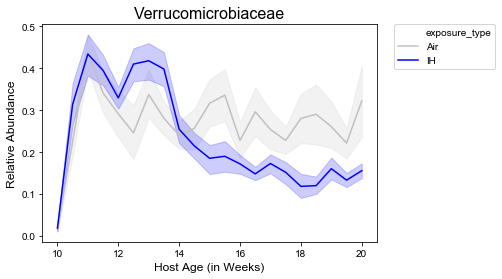

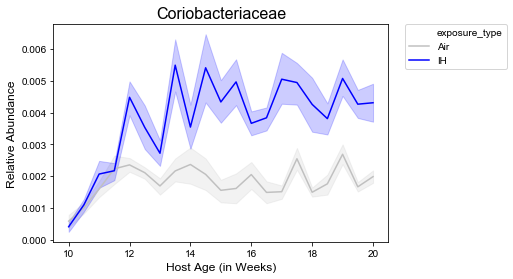

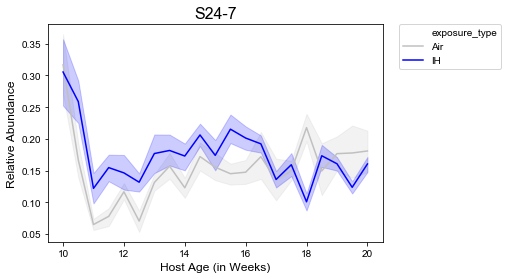

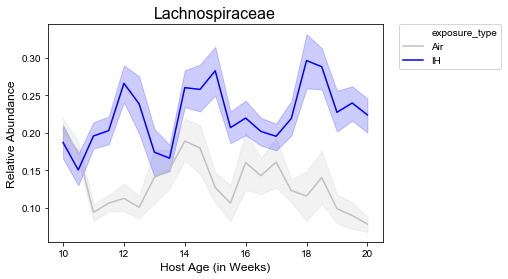

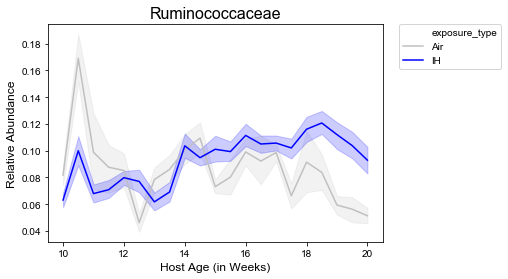

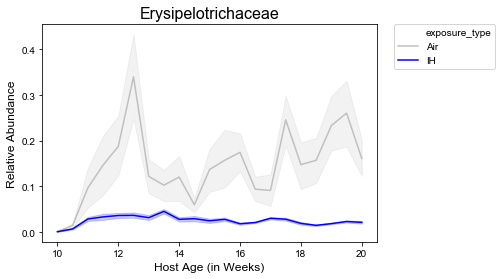

In [14]:
for fam in famlist:
    g = sns.lineplot(x='host_age', y=fam, hue='exposure_type', ci=68, 
                     palette=['silver', 'blue'], data=ih_family_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(fam, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/IH/longIH_micro_SEM_%s.svg' % fam, dpi=300, bbox_inches = "tight")
    plt.show()

## IC vs Air

In [15]:
ic_micro_fam = pd.read_table('../data/Microbiome/longIHIC_HFD_fecal_longIC_family_relfreq.txt', sep='\t', index_col=0)
ic_micro_fam_rf = ic_micro_fam.T
ic_micro_fam_rf.head()

#OTU ID,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Brevibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Corynebacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Intrasporangiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Nocardiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Actinobacteria;c__Rubrobacteria;o__Rubrobacterales;f__Rubrobacteraceae,k__Bacteria;p__Actinobacteria;c__Thermoleophilia;o__Solirubrobacterales;__,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pasteurellales;f__Pasteurellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Thiotrichales;f__Piscirickettsiaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
11829.A45.181.8,0.0,0.0,0.0,0.0,0.0,0.0,0.007349,0.001142,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.120933,0.0,0.0
11829.A43.172.9,0.0,0.0,0.0,0.0,0.0,0.0,0.001985,0.001732,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000084,0.369457,0.0,0.0
11829.A44.175.10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000496,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000744,0.320868,0.0,0.0
11829.A45.179.13,0.0,0.0,0.0,0.0,0.0,0.0,0.038562,0.001471,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000640,0.139733,0.0,0.0
11829.A41.163.10,0.0,0.0,0.0,0.0,0.0,0.0,0.000878,0.001287,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.426632,0.0,0.0


In [16]:
ic_family_relfreq = pd.merge(ic_micro_fam_rf, ihic_micro_md, left_index=True, right_index=True)
ic_family_relfreq.head()

,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Brevibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Corynebacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Intrasporangiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Nocardiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Actinobacteria;c__Rubrobacteria;o__Rubrobacterales;f__Rubrobacteraceae,k__Bacteria;p__Actinobacteria;c__Thermoleophilia;o__Solirubrobacterales;__,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
11829.A45.181.8,0.0,0.0,0.0,0.0,0.0,0.0,0.007349,0.001142,0.0,0.0,...,Mouse 181,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A43.172.9,0.0,0.0,0.0,0.0,0.0,0.0,0.001985,0.001732,0.0,0.0,...,Mouse 172,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A44.175.10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000496,0.0,0.0,...,Mouse 175,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A45.179.13,0.0,0.0,0.0,0.0,0.0,0.0,0.038562,0.001471,0.0,0.0,...,Mouse 179,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A41.163.10,0.0,0.0,0.0,0.0,0.0,0.0,0.000878,0.001287,0.0,0.0,...,Mouse 163,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [17]:
ic_family_relfreq_renamed = ic_family_relfreq.rename(columns={'k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae':'Verrucomicrobiaceae', 
           'k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae':'Coriobacteriaceae', 
           'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7':'S24-7', 
           'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae':'Lachnospiraceae', 
           'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae':'Ruminococcaceae', 
            'k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae': 'Erysipelotrichaceae'})

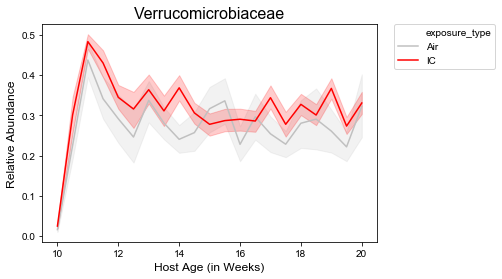

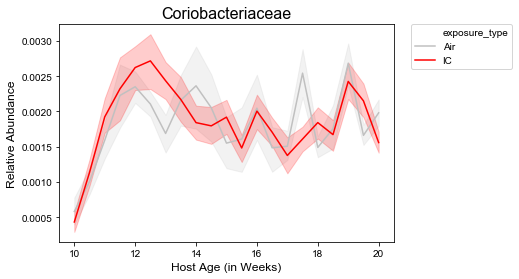

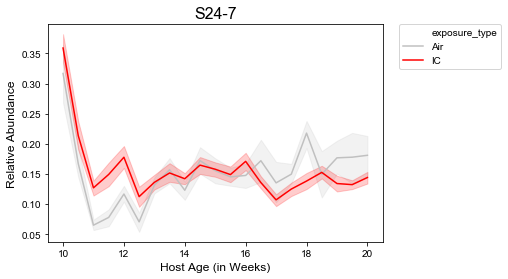

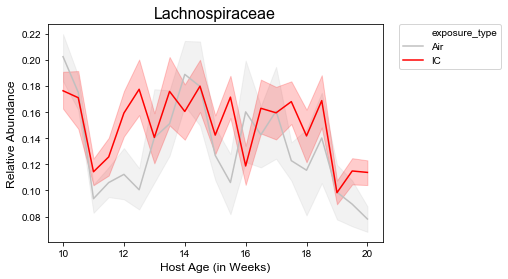

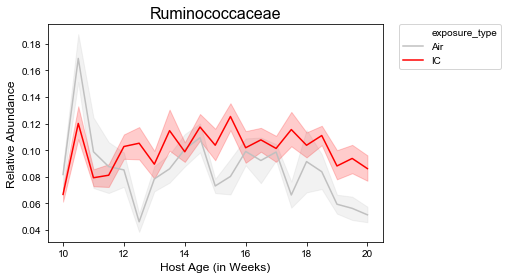

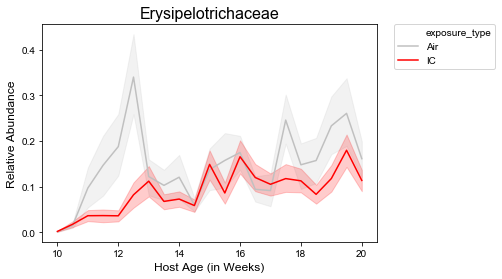

In [18]:
for fam in famlist:
    g = sns.lineplot(x='host_age', y=fam, hue='exposure_type', ci=68, 
                     palette=['silver', 'red'], data=ic_family_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(fam, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/IC/longIC_micro_SEM_%s.svg' % fam, dpi=300, bbox_inches = "tight")
    plt.show()

## IH vs IC

In [19]:
noAir_micro_fam = pd.read_table('../data/Microbiome/longIHIC_HFD_fecal_noAir_family_relfreq.txt', sep='\t', index_col=0)
noAir_micro_fam_rf = noAir_micro_fam.T
noAir_micro_fam_rf.head()

#OTU ID,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Brevibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Corynebacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Intrasporangiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Mycobacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Nocardiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Actinobacteria;c__Thermoleophilia;o__Solirubrobacterales;f__,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Thiotrichales;f__Piscirickettsiaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__Verrucomicrobia;c__[Spartobacteria];o__[Chthoniobacterales];f__[Chthoniobacteraceae],k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
11829.A37.147.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002477,0.001711,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.048959,0.0,0.0,0.000000
11829.A43.172.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001985,0.001732,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000084,0.369457,0.0,0.0,0.000000
11829.A36.146.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.011264,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.118186,0.0,0.0,0.000000
11829.A38.152.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000272,0.005920,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.477989,0.0,0.0,0.000204
11829.A41.163.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000878,0.001287,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.426632,0.0,0.0,0.000000


In [20]:
noAir_family_relfreq = pd.merge(noAir_micro_fam_rf, ihic_micro_md, left_index=True, right_index=True)
noAir_family_relfreq.head()

,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Brevibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Corynebacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Intrasporangiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Mycobacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Nocardiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Actinobacteria;c__Thermoleophilia;o__Solirubrobacterales;f__,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
11829.A37.147.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002477,0.001711,0.0,...,Mouse 147,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A43.172.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001985,0.001732,0.0,...,Mouse 172,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A36.146.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.011264,0.0,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A38.152.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000272,0.005920,0.0,...,Mouse 152,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A41.163.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000878,0.001287,0.0,...,Mouse 163,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [21]:
noAir_family_relfreq_renamed = noAir_family_relfreq.rename(columns={'k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae':'Verrucomicrobiaceae', 
           'k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae':'Coriobacteriaceae', 
           'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7':'S24-7', 
           'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae':'Lachnospiraceae', 
           'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae':'Ruminococcaceae', 
            'k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae': 'Erysipelotrichaceae'})

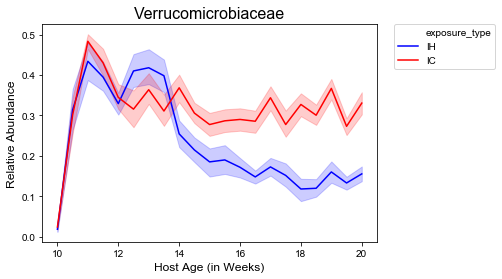

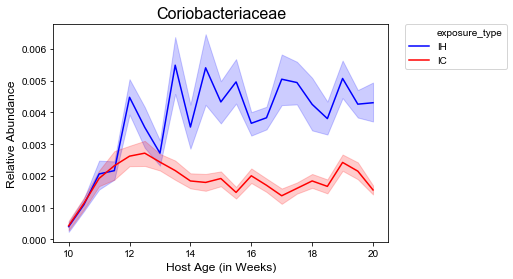

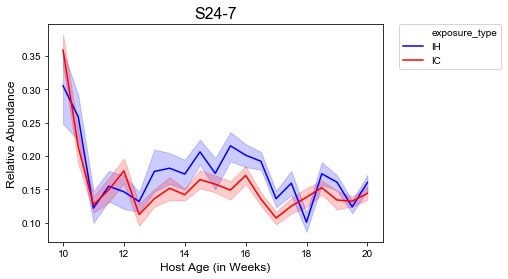

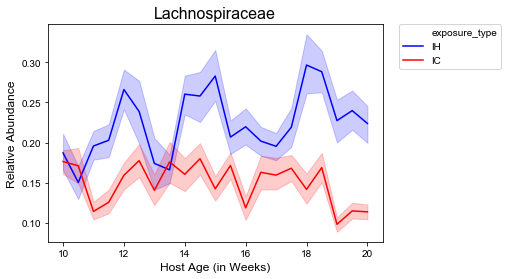

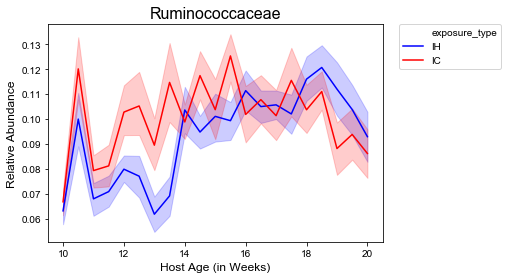

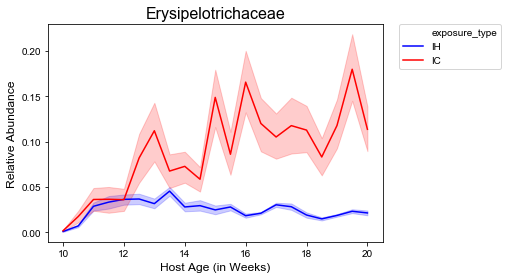

In [22]:
for fam in famlist:
    g = sns.lineplot(x='host_age', y=fam, hue='exposure_type', ci=68, 
                     palette=['blue', 'red'], data=noAir_family_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(fam, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/noAir/long_noAir_micro_SEM_%s.svg' % fam, dpi=300, bbox_inches = "tight")
    plt.show()

# Heatmaps

In [23]:
ihc_family_relfreq_renamed['new_index'] = ihc_family_relfreq_renamed['exposure_type'].astype(str) + '_' + ihc_family_relfreq_renamed['host_age'].astype(str)
famlist2 = famlist
famlist2.append('new_index')
IHC_hm = ihc_family_relfreq_renamed[famlist2].copy()
IHC_hm.set_index('new_index', inplace=True)
IHC_hm

,Verrucomicrobiaceae,Coriobacteriaceae,S24-7,Lachnospiraceae,Ruminococcaceae,Erysipelotrichaceae
new_index,,,,,,
IHC_14.5,0.730098,0.000784,0.006863,0.061275,0.023824,0.011078
IHC_17.5,0.520392,0.001471,0.148235,0.114804,0.064216,0.006078
Air_14.0,0.134706,0.001078,0.262451,0.042059,0.044804,0.379804
IHC_19.0,0.697255,0.002647,0.040588,0.043725,0.023627,0.012255
IHC_14.5,0.756961,0.000784,0.002941,0.042941,0.029510,0.004412
...,...,...,...,...,...,...
Air_11.5,0.123137,0.002353,0.245000,0.070980,0.138137,0.047843
IHC_15.0,0.192647,0.002549,0.211176,0.130490,0.099118,0.014804
IHC_16.5,0.711961,0.002157,0.163627,0.025882,0.030980,0.005392


In [24]:
IHC_hm2 = IHC_hm.groupby(IHC_hm.index, axis=0).mean()
IHC_hm2

,Verrucomicrobiaceae,Coriobacteriaceae,S24-7,Lachnospiraceae,Ruminococcaceae,Erysipelotrichaceae
new_index,,,,,,
Air_10.0,0.025212,0.000400,0.521078,0.120286,0.047230,0.000980
Air_10.5,0.266062,0.001062,0.265997,0.096618,0.103096,0.009649
Air_11.0,0.318791,0.001250,0.215621,0.073603,0.085310,0.019534
Air_11.5,0.257288,0.001710,0.237767,0.066035,0.080708,0.036699
Air_12.0,0.154698,0.001601,0.200923,0.154003,0.098113,0.076520
Air_12.5,0.201221,0.001061,0.232335,0.121952,0.091355,0.091800
Air_13.0,0.087157,0.002718,0.112620,0.143414,0.119572,0.178173
Air_13.5,0.104893,0.003405,0.152424,0.093859,0.097709,0.196132
Air_14.0,0.177888,0.001248,0.252629,0.079884,0.109162,0.149082


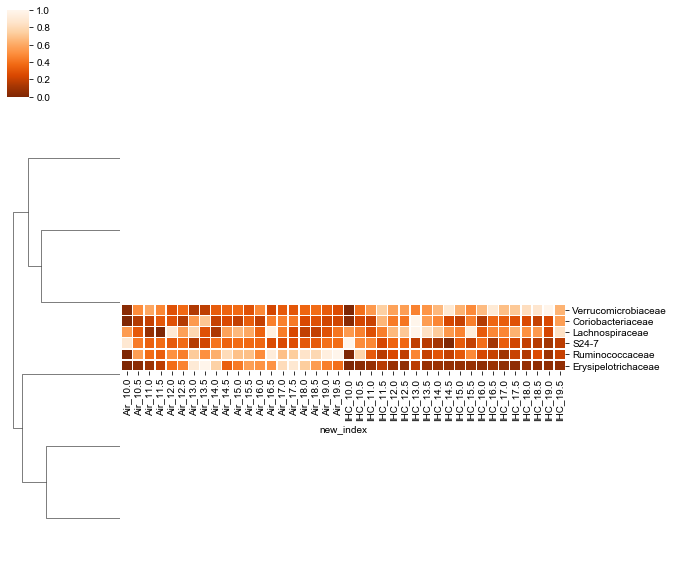

In [38]:
ax = sns.clustermap(IHC_hm2.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHC_fam_heatmap.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [39]:
norder = ['Verrucomicrobiaceae', 'Coriobacteriaceae', 'S24-7', 'Lachnospiraceae', 'Ruminococcaceae']

In [58]:
famlistz = ['Verrucomicrobiaceae', 'Erysipelotrichaceae', 'S24-7', 'Ruminococcaceae', 'Coriobacteriaceae',  'Lachnospiraceae']

In [59]:
IHC_hm3 = IHC_hm2[famlistz].copy()

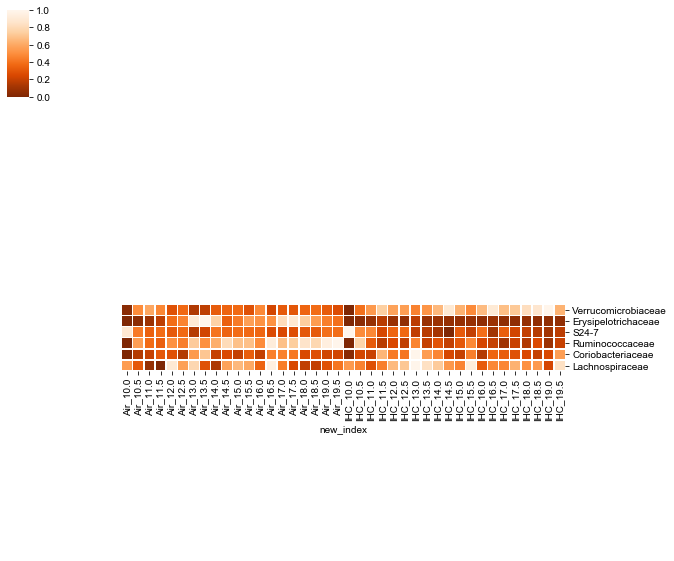

In [60]:
ax = sns.clustermap(IHC_hm3.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               row_cluster=False, col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHC_fam_heatmap.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [40]:
ihic_micro_md

,metab-sample-id,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,diet,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
sample_name,,,,,,,,,,,,,,,,,,,,,
11829.A34.135.1,A34_135_1,weeks,A34.135.1,Not applicable,On shelf,NaN,A34,4/3/18 12:00,Mouse 135 baseline stool collection 1 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.10,A34_135_10,weeks,A34.135.10,18,On shelf,NaN,A34a,5/4/18 12:00,Mouse 135 stool collection 10 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.11,A34_135_11,weeks,A34.135.11,23.9,On shelf,NaN,A34a,5/8/18 12:00,Mouse 135 stool collection 11 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.12,A34_135_12,weeks,A34.135.12,17.4,On shelf,NaN,A34a,5/11/18 12:00,Mouse 135 stool collection 12 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.13,A34_135_13,weeks,A34.135.13,23.1,On shelf,NaN,A34a,5/15/18 12:00,Mouse 135 stool collection 13 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11829.BLANK8.8G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11829.BLANK9.9A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11829.BLANK9.9E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
ihic_all = pd.read_csv('../data/Microbiome/longIHIC_rarefied_fecal_HFD_family_relfreq.txt', sep='\t', index_col=0)
all_ihic = ihic_all.T
all_ihic.head()

#OTU ID,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Brevibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Corynebacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Intrasporangiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Mycobacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Nocardiaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Actinobacteria;c__Rubrobacteria;o__Rubrobacterales;f__Rubrobacteraceae,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Thiotrichales;f__Piscirickettsiaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
11829.A45.181.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007340,0.001277,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.116170,0.0,0.0
11829.A37.147.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002872,0.001702,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.049787,0.0,0.0
11829.A43.172.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002447,0.001915,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000106,0.374255,0.0,0.0
11829.A44.175.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000319,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000532,0.319149,0.0,0.0
11829.A36.146.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.011064,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.122660,0.0,0.0


In [42]:
ihic_all_relfrq = pd.merge(ihic_micro_md, all_ihic, left_index=True, right_index=True)
ihic_all_relfrq.head()

,metab-sample-id,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,diet,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Thiotrichales;f__Piscirickettsiaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
11829.A36.143.1,A36_143_1,weeks,A36.143.1,Not applicable,In chamber,NaN,A36,4/3/18 10:00,Mouse 143 baseline stool collection 1 of 21,HFD,...,0.000000,0.0,0.0,0.0,0.0,0.009894,0.010319,0.004362,0.0,0.0
11829.A36.143.10,A36_143_10,weeks,A36.143.10,35.8,In chamber,NaN,A36,5/4/18 10:00,Mouse 143 stool collection 10 of 21,HFD,...,0.000106,0.0,0.0,0.0,0.0,0.000000,0.000000,0.106702,0.0,0.0
11829.A36.143.11,A36_143_11,weeks,A36.143.11,42.7,In chamber,NaN,A36,5/8/18 10:00,Mouse 143 stool collection 11 of 21,HFD,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.094043,0.0,0.0
11829.A36.143.12,A36_143_12,weeks,A36.143.12,34.1,In chamber,NaN,A36,5/11/18 10:00,Mouse 143 stool collection 12 of 21,HFD,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.293404,0.0,0.0
11829.A36.143.13,A36_143_13,weeks,A36.143.13,45.7,In chamber,New lot of food,A36,5/15/18 10:00,Mouse 143 stool collection 13 of 21,HFD,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.104149,0.0,0.0


In [43]:
ihic_all_relfrq_renamed = ihic_all_relfrq.rename(columns={'k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae':'Verrucomicrobiaceae', 
           'k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae':'Coriobacteriaceae', 
           'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7':'S24-7', 
           'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae':'Lachnospiraceae', 
           'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae':'Ruminococcaceae', 
            'k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae': 'Erysipelotrichaceae'})

In [44]:
ihic_all_relfrq_renamed['new_index'] = ihic_all_relfrq_renamed['exposure_type'].astype(str) + '_' + ihic_all_relfrq_renamed['host_age'].astype(str)
famlist3 = ['Verrucomicrobiaceae', 'Erysipelotrichaceae', 'Coriobacteriaceae', 'Lachnospiraceae', 'Ruminococcaceae', 'S24-7', 'new_index']
IHIC_hm = ihic_all_relfrq_renamed[famlist3].copy()
IHIC_hm.set_index('new_index', inplace=True)
IHIC_hm

,Verrucomicrobiaceae,Erysipelotrichaceae,Coriobacteriaceae,Lachnospiraceae,Ruminococcaceae,S24-7
new_index,,,,,,
IH_10.0,0.004362,0.000851,0.000532,0.153298,0.075426,0.375745
IH_14.5,0.106702,0.011277,0.003617,0.388191,0.139043,0.197234
IH_15.0,0.094043,0.007234,0.002872,0.473617,0.166277,0.099681
IH_15.5,0.293404,0.042021,0.006489,0.079894,0.078511,0.355745
IH_16.0,0.104149,0.010426,0.005638,0.221809,0.139574,0.146596
...,...,...,...,...,...,...
Air_12.0,0.195106,0.426064,0.001915,0.082021,0.048404,0.060213
Air_12.5,0.132128,0.492660,0.002553,0.104255,0.026064,0.035000
Air_13.0,0.123617,0.179149,0.001170,0.362447,0.088191,0.081809


In [45]:
IHIC_hm2 = IHIC_hm.groupby(IHIC_hm.index, axis=0).mean()
IHIC_hm2

,Verrucomicrobiaceae,Erysipelotrichaceae,Coriobacteriaceae,Lachnospiraceae,Ruminococcaceae,S24-7
new_index,,,,,,
Air_10.0,0.017340,0.001125,0.000653,0.207705,0.080350,0.342021
Air_10.5,0.229286,0.012629,0.001064,0.179134,0.173465,0.166520
Air_11.0,0.414757,0.107538,0.001413,0.093556,0.097979,0.068283
Air_11.5,0.341968,0.146476,0.002261,0.105838,0.087008,0.077088
Air_12.0,0.293630,0.186769,0.002327,0.112593,0.084508,0.116037
...,...,...,...,...,...,...
IH_18.0,0.117653,0.019249,0.004289,0.296682,0.115665,0.101177
IH_18.5,0.114823,0.014922,0.003887,0.294986,0.122887,0.176922
IH_19.0,0.158759,0.018255,0.004872,0.233745,0.114291,0.158837


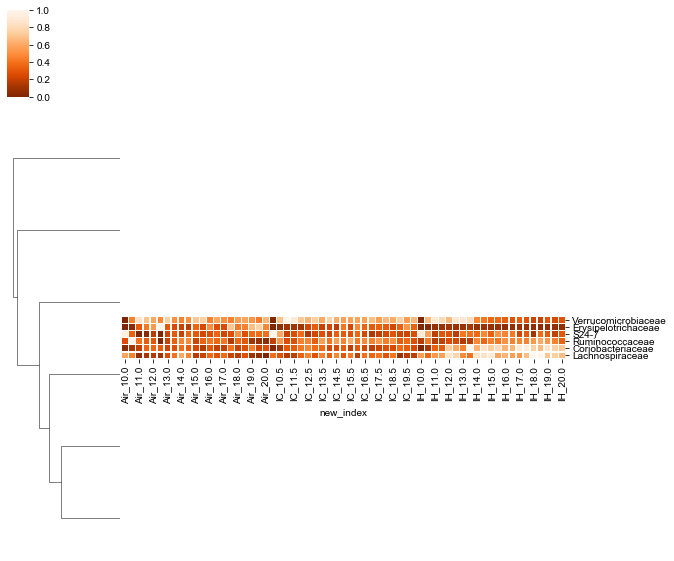

In [51]:
ax = sns.clustermap(IHIC_hm2.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHIC_fam_heatmap.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [47]:
theIC = IHIC_hm2.filter(regex='IC', axis=0)
theAir = IHIC_hm2.filter(regex='Air', axis=0)
AirIC = pd.concat([theAir, theIC])

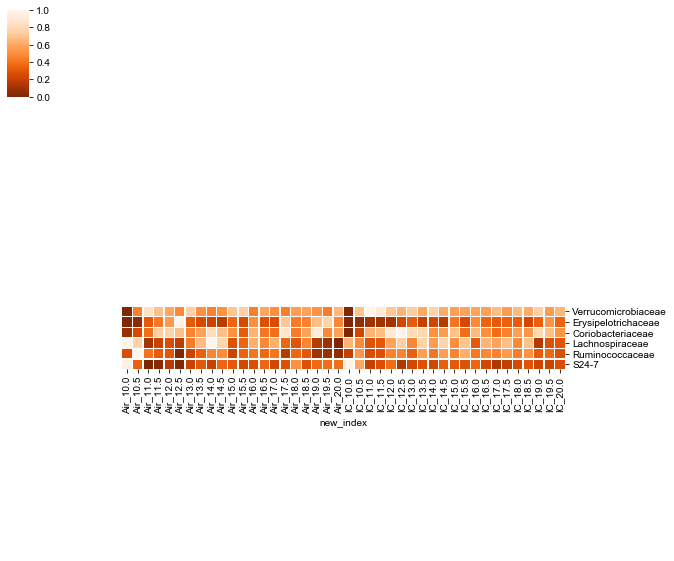

In [48]:
ax1 = sns.clustermap(AirIC.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/ICAir_heatmap_all.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [49]:
theIH = IHIC_hm2.filter(regex='IH', axis=0)
theAir = IHIC_hm2.filter(regex='Air', axis=0)
AirIH = pd.concat([theAir, theIH])

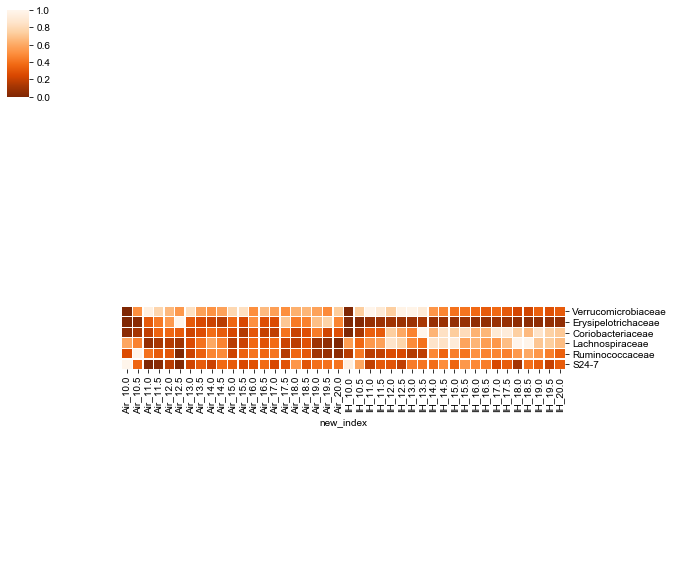

In [50]:
ax1 = sns.clustermap(AirIH.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/ICAir_heatmap_all.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean